In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

In [133]:
df = pd.read_csv("diabetes_data_upload.csv")
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [134]:
df.info()
# object represents Categorical, integer is just Age

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [135]:
df.shape

(520, 17)

In [136]:
missing_values = df.isnull().sum()
print(missing_values)

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64


In [137]:
duplicate_values = df.duplicated().sum()
print(duplicate_values)

269


In [138]:
# dropping duplicate rows
data  = df.drop_duplicates()
data.shape

(251, 17)

In [139]:
data.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,251.000000,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251,251
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,Positive
freq,NaN,160,132,127,147,159,134,184,140,127,180,126,139,153,161,207,173
mean,48.864542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.526036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Univariate Analysis 

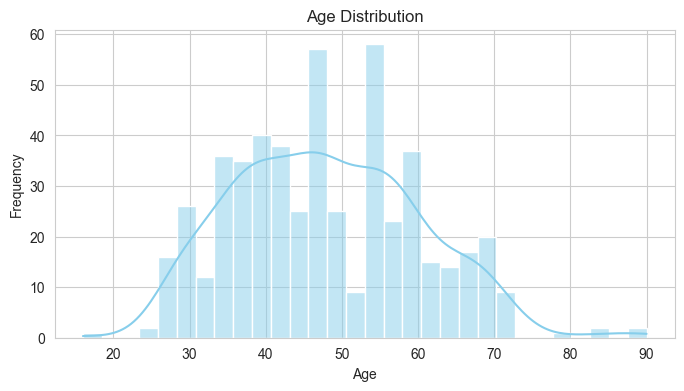

In [140]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

# Plotting Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


The age distribution indicates that the dataset contains a wide range of ages, with the majority of individuals being between 40 and 60 years old. There's also a slight skew towards the younger age groups. <br>

the distribution of age in this dataset is right-skewed or positively skewed. This means that there are more individuals in the dataset who are younger in age, and there are relatively fewer individuals who are older. The distribution is stretched towards higher ages, which is characteristic of a right-skewed distribution.

C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: tight_l

2 Polyuria
3 Polydipsia
4 sudden weight loss
5 weakness
6 Polyphagia
7 Genital thrush
8 visual blurring
9 Itching


C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\3441647495.py:22: UserWarning: The fig

10 Irritability
11 delayed healing
12 partial paresis
13 muscle stiffness
14 Alopecia
15 Obesity


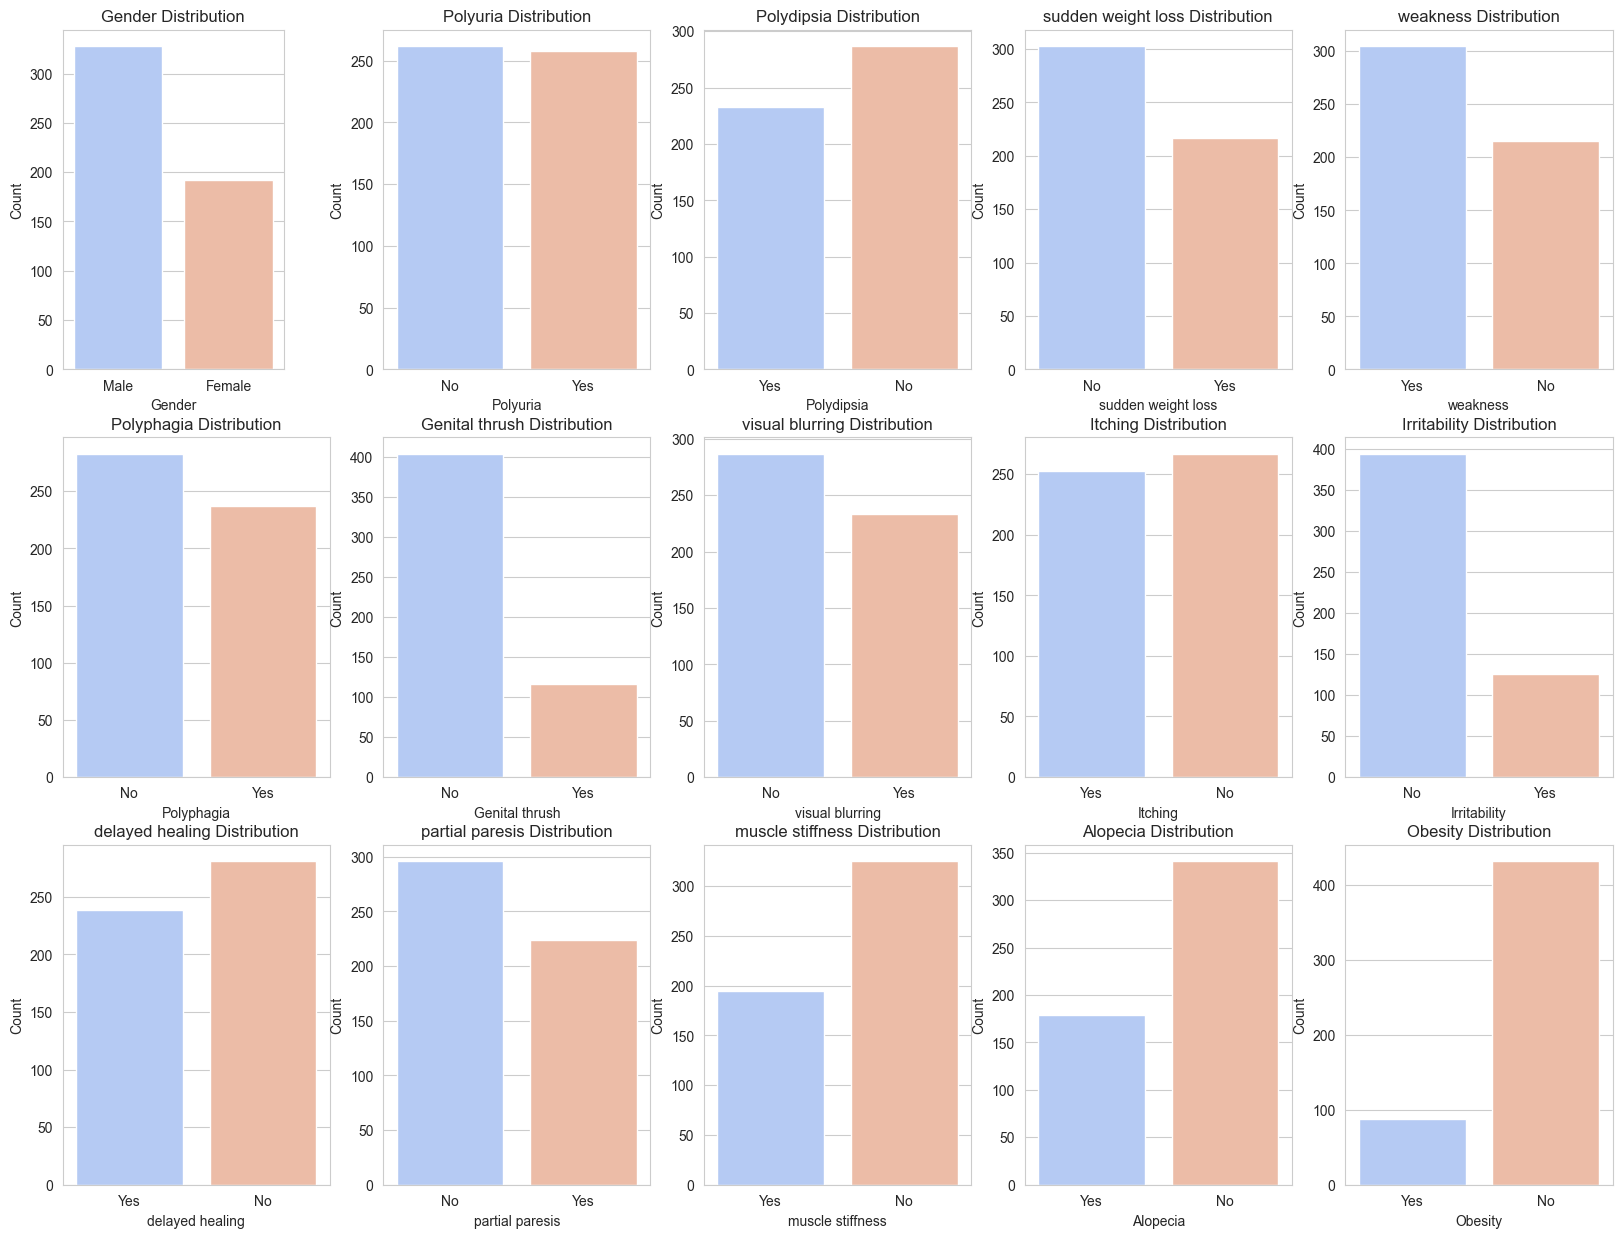

In [141]:
# Plotting Gender distribution and symptoms

# List of columns to plot excluding Age and class
cols_to_plot = df.columns[1:-1]

plt.figure(figsize=(20, 15))

# Plot Gender
plt.subplot(3, 6, 1)
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot each symptom
for idx, col in enumerate(cols_to_plot[1:], 2):  # excluidng gender
    plt.subplot(3, 5, idx)
    sns.countplot(data=df, x=col, palette='coolwarm')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    print(idx,col)

plt.show()


Gender: The dataset contains more males than females.
Symptoms:
Symptoms like 'Polyuria', 'Polydipsia', 'sudden weight loss', and 'weakness' have a relatively higher frequency of 'Yes' responses, indicating that they are more commonly observed among the individuals in the dataset.
Conversely, symptoms like 'Obesity', 'Alopecia', and 'Genital thrush' have a lower frequency of 'Yes' responses, indicating they are less common among the individuals.

In [142]:
print(cols_to_plot[1:])

Index(['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


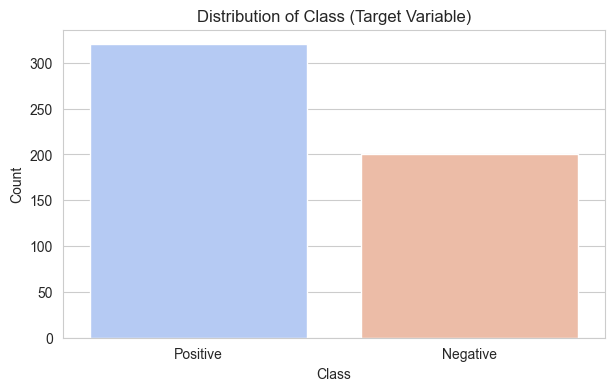

In [143]:
# Plotting distribution of the target variable 'class'
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='class', palette='coolwarm')
plt.title('Distribution of Class (Target Variable)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## Bivariate Analysis

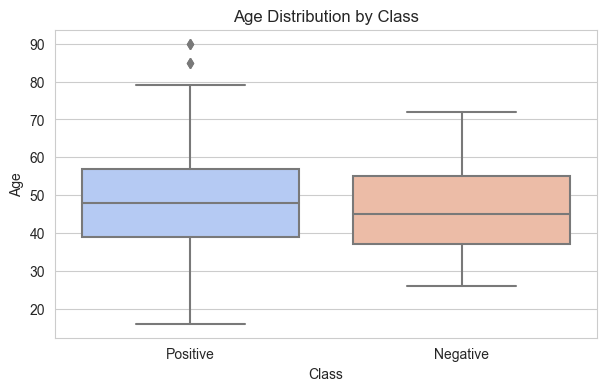

In [144]:
# Plotting Age vs Class
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='class', y='Age', palette='coolwarm')
plt.title('Age Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

The box plot provides the following insights regarding the age distribution across the two classes:

Individuals who are positive for diabetes (Positive class) tend to be slightly older on average compared to those who are negative.
The median age for the positive class is higher than the negative class.
The age distribution for both classes has a considerable overlap, but the positive class has a wider interquartile range.

C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\2383638759.py:19: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\2383638759.py:19: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\2383638759.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\2383638759.py:19: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\2383638759.py:19: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\VARNIKA\AppData\Local\Temp\ipykernel_20740\2383638759.py:19: UserWarning: tight_l

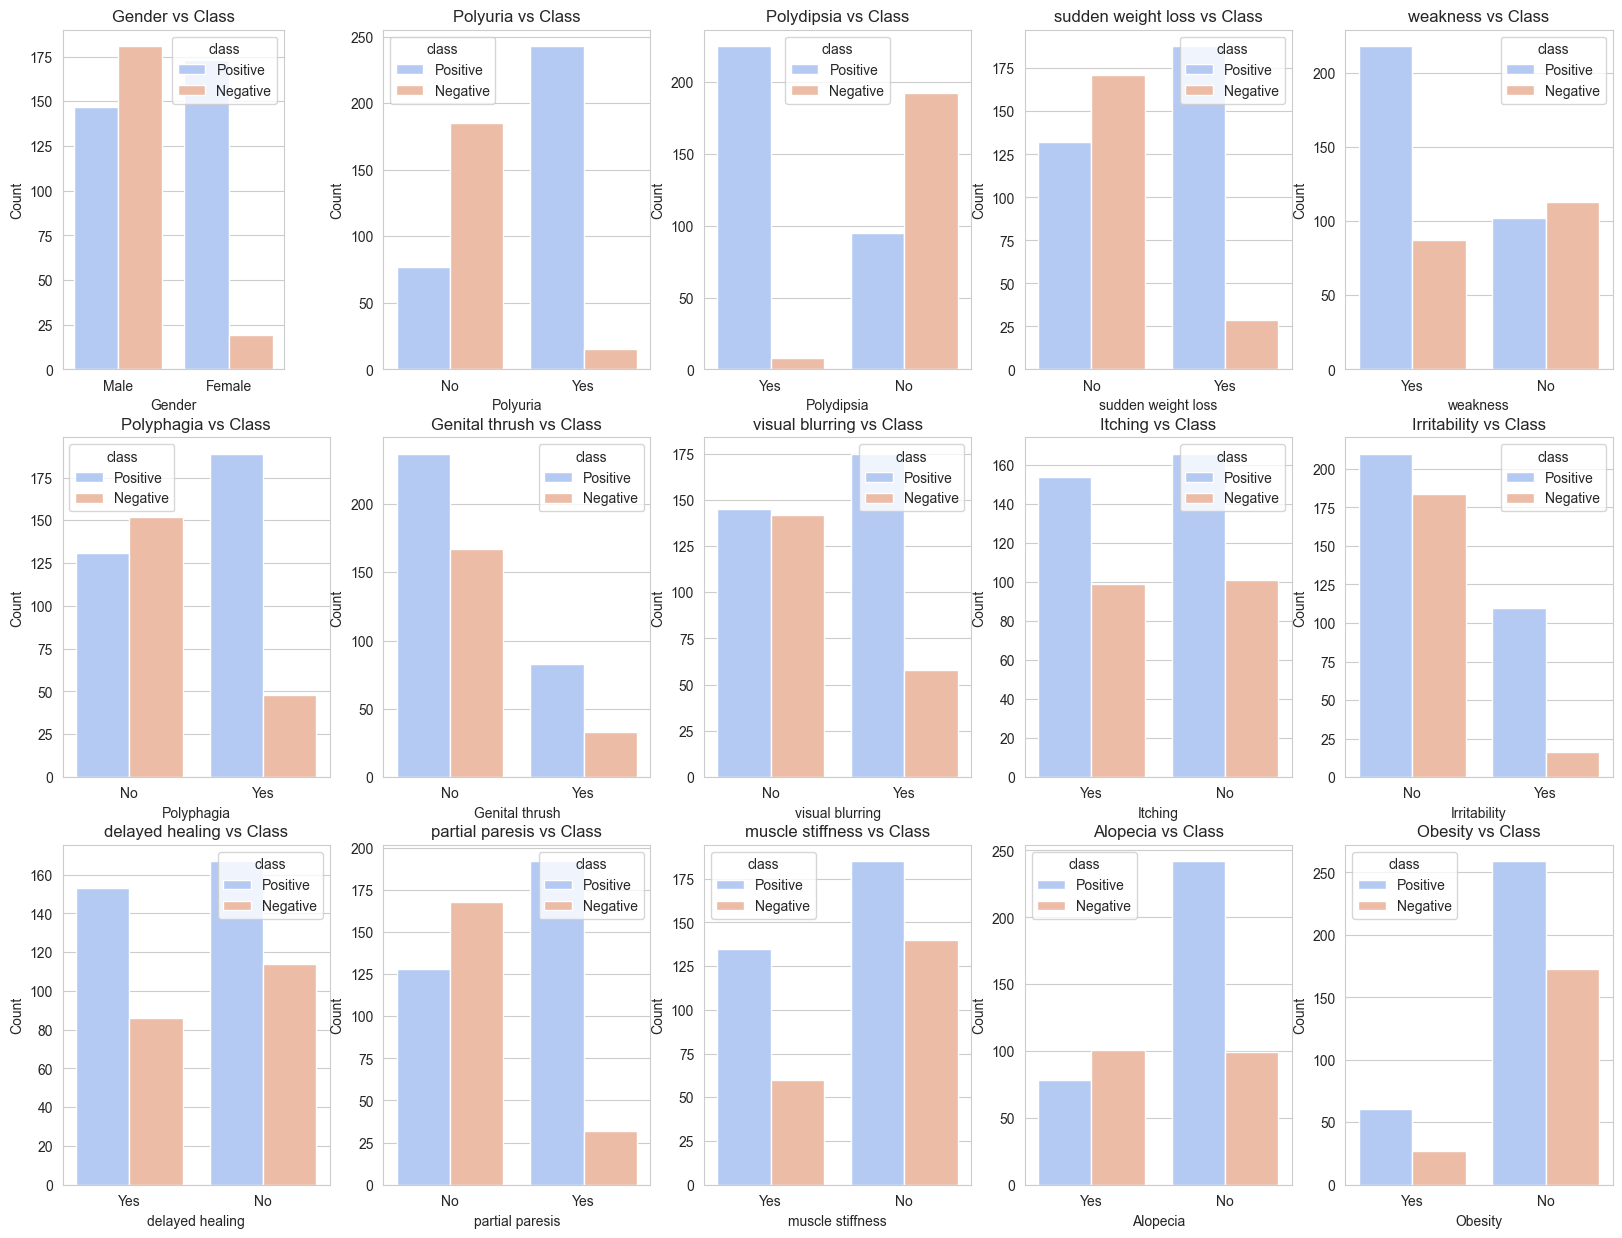

In [145]:
# Plotting Gender vs Class and each symptom vs Class

plt.figure(figsize=(20, 15))

# Plot Gender vs Class
plt.subplot(3, 6, 1)
sns.countplot(data=df, x='Gender', hue='class', palette='coolwarm')
plt.title('Gender vs Class')
plt.xlabel('Gender')
plt.ylabel('Count')

# Plot each symptom vs Class
for idx, col in enumerate(cols_to_plot[1:], 2):
    plt.subplot(3, 5, idx)
    sns.countplot(data=df, x=col, hue='class', palette='coolwarm')
    plt.title(f'{col} vs Class')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


Gender vs. Class: Both males and females have more positive cases than negative ones. However, the proportion of positive cases is slightly higher for males.
Symptoms vs. Class:
Symptoms like 'Polyuria', 'Polydipsia', 'sudden weight loss', and 'partial paresis' have a strong correlation with positive diabetes cases. Most individuals reporting these symptoms are in the positive class.
'Obesity', while less common overall, is more correlated with negative cases.
'Alopecia' and 'Genital thrush' also seem to be more common among the negative class, but the difference is less pronounced.

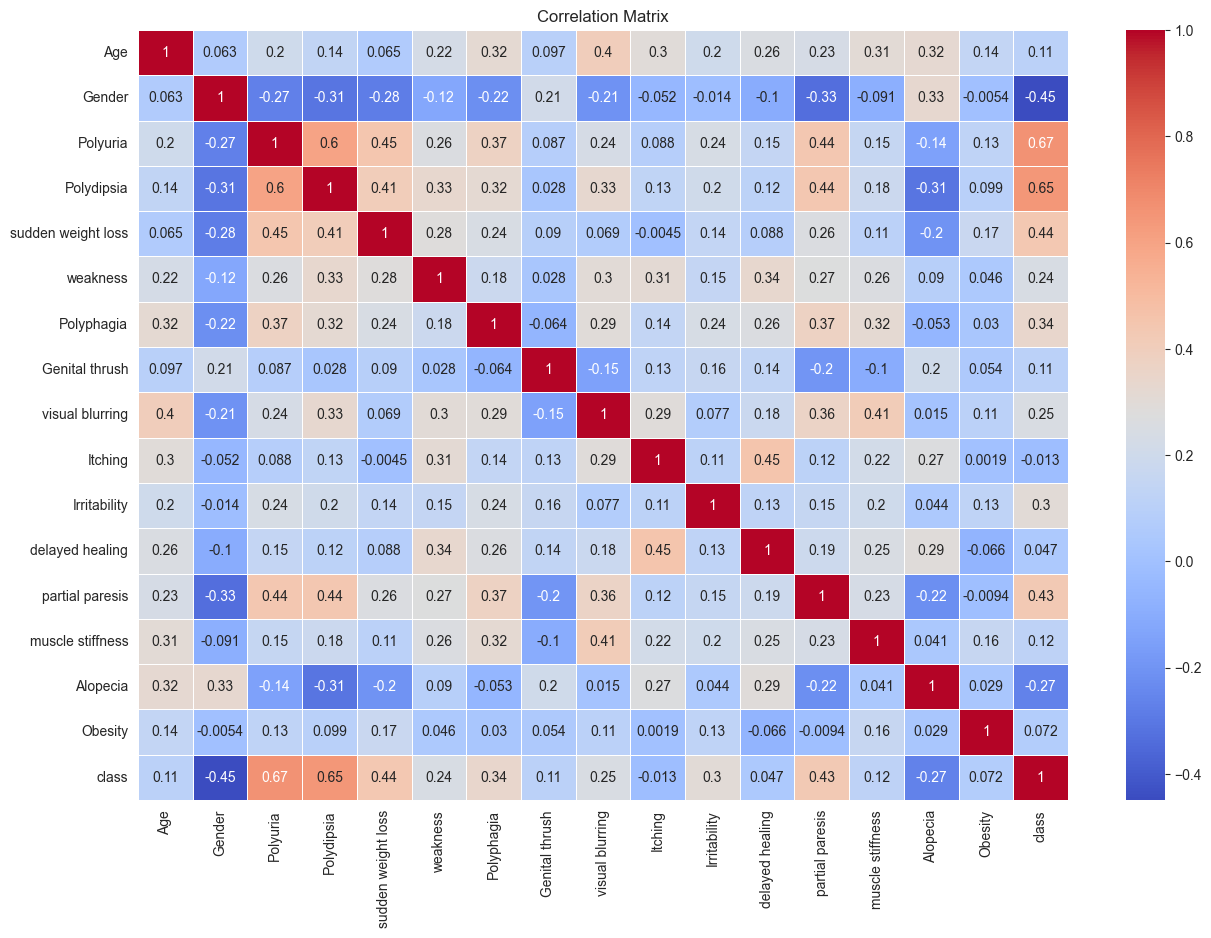

In [146]:
# Encoding categorical variables into numerical ones
df_encoded = df.copy()
df_encoded[cols_to_plot] = df_encoded[cols_to_plot].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0}))

# Encoding target variable
df_encoded['class'] = df_encoded['class'].map({'Positive': 1, 'Negative': 0})

# Computing the correlation matrix
correlation_matrix = df_encoded.corr()

# Plotting the correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Predictive Modelling - Logistic Regression

In [147]:

# Separating features (X) and target (y)
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']


In [148]:
X

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0
516,48,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0
517,58,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1
518,32,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0


In [149]:
y

0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

     Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
434   53       1         1           1                   1         1   
436   41       1         1           1                   1         1   
208   54       1         0           0                   1         1   
332   50       0         0           0                   0         1   
220   38       1         0           0                   0         0   
..   ...     ...       ...         ...                 ...       ...   
71    35       0         0           1                   1         1   
106   58       1         0           1                   1         1   
270   40       0         1           1                   1         1   
435   57       1         1           1                   1         1   
102   90       0         0           1                   1         0   

     Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
434           1               0                1        0   

In [151]:
print(X_test.shape)

(104, 16)


In [152]:
print(y_train)

434    1
436    1
208    0
332    0
220    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: class, Length: 416, dtype: int64


In [153]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [154]:
X_train

array([[ 0.3866783 ,  0.73923501,  1.02927447, ..., -0.77857409,
         1.31789306, -0.43424812],
       [-0.59566168,  0.73923501,  1.02927447, ..., -0.77857409,
        -0.75878691,  2.30283093],
       [ 0.46853996,  0.73923501, -0.97155815, ..., -0.77857409,
         1.31789306, -0.43424812],
       ...,
       [-0.67752335, -1.35274978,  1.02927447, ...,  1.28439929,
        -0.75878691, -0.43424812],
       [ 0.71412496,  0.73923501,  1.02927447, ..., -0.77857409,
        -0.75878691, -0.43424812],
       [ 3.4155599 , -1.35274978, -0.97155815, ...,  1.28439929,
         1.31789306, -0.43424812]])

In [155]:
X_test

array([[ 1.94204993,  0.73923501,  1.02927447, ...,  1.28439929,
         1.31789306, -0.43424812],
       [-0.67752335, -1.35274978,  1.02927447, ..., -0.77857409,
        -0.75878691, -0.43424812],
       [ 0.71412496,  0.73923501,  1.02927447, ..., -0.77857409,
        -0.75878691, -0.43424812],
       ...,
       [ 1.45087994,  0.73923501,  1.02927447, ...,  1.28439929,
        -0.75878691, -0.43424812],
       [-0.18635336,  0.73923501, -0.97155815, ..., -0.77857409,
         1.31789306, -0.43424812],
       [-1.49614   ,  0.73923501, -0.97155815, ..., -0.77857409,
        -0.75878691, -0.43424812]])

In [156]:
# Training the Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [157]:
# Predicting on the test set
y_pred = logistic_regression.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], dtype=int64)

In [158]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_lr = classification_report(y_test, y_pred)

In [159]:
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_lr)

Logistic Regression Model Performance:
Accuracy: 0.92
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



# SVM (Support Vector Machine)

In [160]:
# Training the Support Vector Machine (SVM) model
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [161]:

# Predicting on the test set
y_pred_svm = svm_classifier.predict(X_test)
print(y_pred_svm)

[0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0]


In [162]:
# Evaluating the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

In [163]:
print("\nSupport Vector Machine (SVM) Model Performance:")
print(f"Accuracy: {accuracy_svm:.2f}")
print("Classification Report:\n", classification_report_svm)


Support Vector Machine (SVM) Model Performance:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.93      0.93      0.93        71

    accuracy                           0.90       104
   macro avg       0.89      0.89      0.89       104
weighted avg       0.90      0.90      0.90       104



## K - nearest neighbor

In [164]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [165]:
# Predicting on the test set
y_pred_knn = knn_classifier.predict(X_test)


In [166]:
# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", classification_report_knn)


K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.97      0.89      0.93        71

    accuracy                           0.90       104
   macro avg       0.88      0.91      0.89       104
weighted avg       0.91      0.90      0.91       104



In [167]:

# Training the K-Nearest Neighbors (KNN) model
knn_classifier = KNeighborsClassifier(n_neighbors=4)
knn_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", classification_report_knn)



K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.97      0.89      0.93        71

    accuracy                           0.90       104
   macro avg       0.88      0.91      0.89       104
weighted avg       0.91      0.90      0.91       104



In [168]:

# Training the K-Nearest Neighbors (KNN) model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", classification_report_knn)



K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.95      0.89      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.90      0.88       104
weighted avg       0.90      0.89      0.90       104



In [169]:

# Training the K-Nearest Neighbors (KNN) model
knn_classifier = KNeighborsClassifier(n_neighbors=6)
knn_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluating the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_report_knn = classification_report(y_test, y_pred_knn)

print("\nK-Nearest Neighbors (KNN) Model Performance:")
print(f"Accuracy: {accuracy_knn:.2f}")
print("Classification Report:\n", classification_report_knn)


K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.91      0.85        33
           1       0.95      0.89      0.92        71

    accuracy                           0.89       104
   macro avg       0.87      0.90      0.88       104
weighted avg       0.90      0.89      0.90       104

